Importação das Bibliotecas

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

Otendo o Dataframe

In [20]:
fashion_mnist = keras.datasets.fashion_mnist

4431872/4422102 [==============================] - 0s 0us/step


Separando e Conferindo dados em Treino e Teste

In [21]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [24]:
train_images.shape

(60000, 28, 28)

In [23]:
train_labels.shape

(60000,)

Carregando a base de dados e retornando um DataSet Numpy

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Pré processando os dados

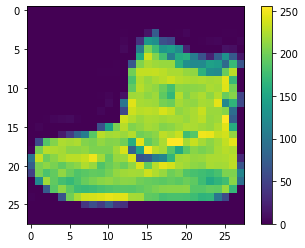

In [28]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [29]:
train_images = train_images / 255.0
test_images = test_images / 255.0

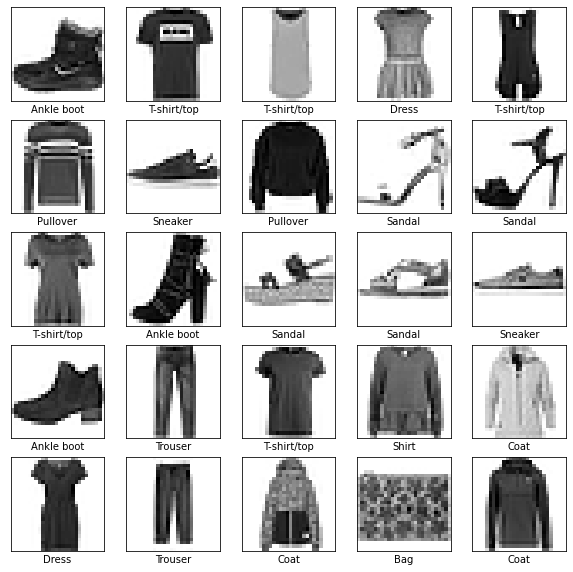

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Criando e compilando o modelo

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Treinando o modelo e verificando Acurácia

In [33]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5014 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2473 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [34]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nAcurácia:', test_acc)

313/313 - 0s - loss: 0.3330 - accuracy: 0.8842 - 485ms/epoch - 2ms/step

Acurácia: 0.8841999769210815


Efetuando Predições

In [35]:
predictions = model.predict(test_images)

In [36]:
predictions[0]

array([1.2403600e-06, 5.2345949e-12, 1.3875615e-08, 4.8687696e-11,
       6.1822383e-09, 4.5853672e-03, 1.2093211e-07, 1.7783087e-02,
       1.3500056e-08, 9.7763014e-01], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [38]:
test_labels[0]

9

Exibindo graficamente como se parece uma previsão em um conjunto de 10 classes

In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

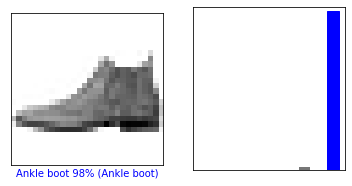

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

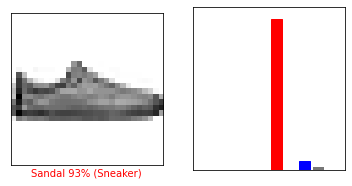

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

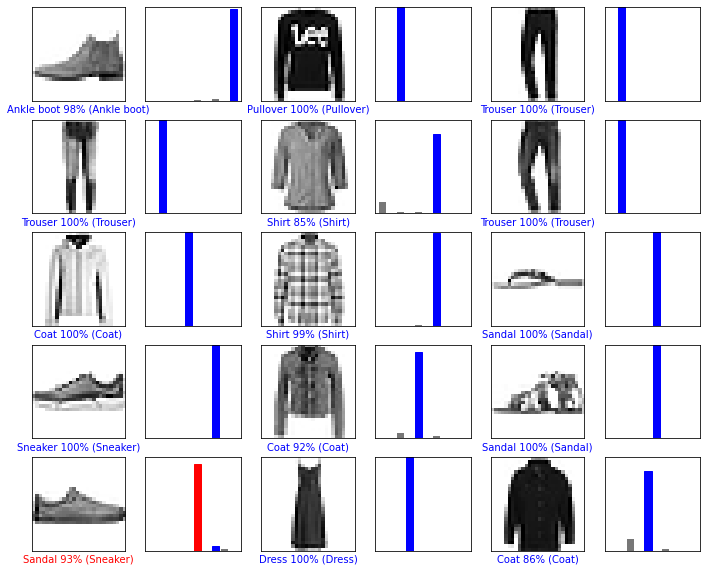

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Gerando a predição em uma única imagem

In [43]:
img = test_images[0]
print(img.shape)

(28, 28)


In [44]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [45]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.2403600e-06 5.2346248e-12 1.3875589e-08 4.8687509e-11 6.1822263e-09
  4.5853672e-03 1.2093211e-07 1.7783094e-02 1.3500083e-08 9.7763014e-01]]


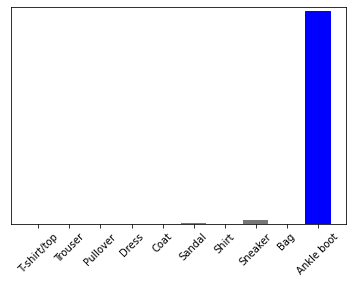

In [46]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [47]:
np.argmax(predictions_single[0])

9